In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import files
uploaded = files.upload()


Saving winequality-red.csv to winequality-red (1).csv


In [12]:
data = pd.read_csv("winequality-red.csv")

In [13]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [14]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

In [15]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


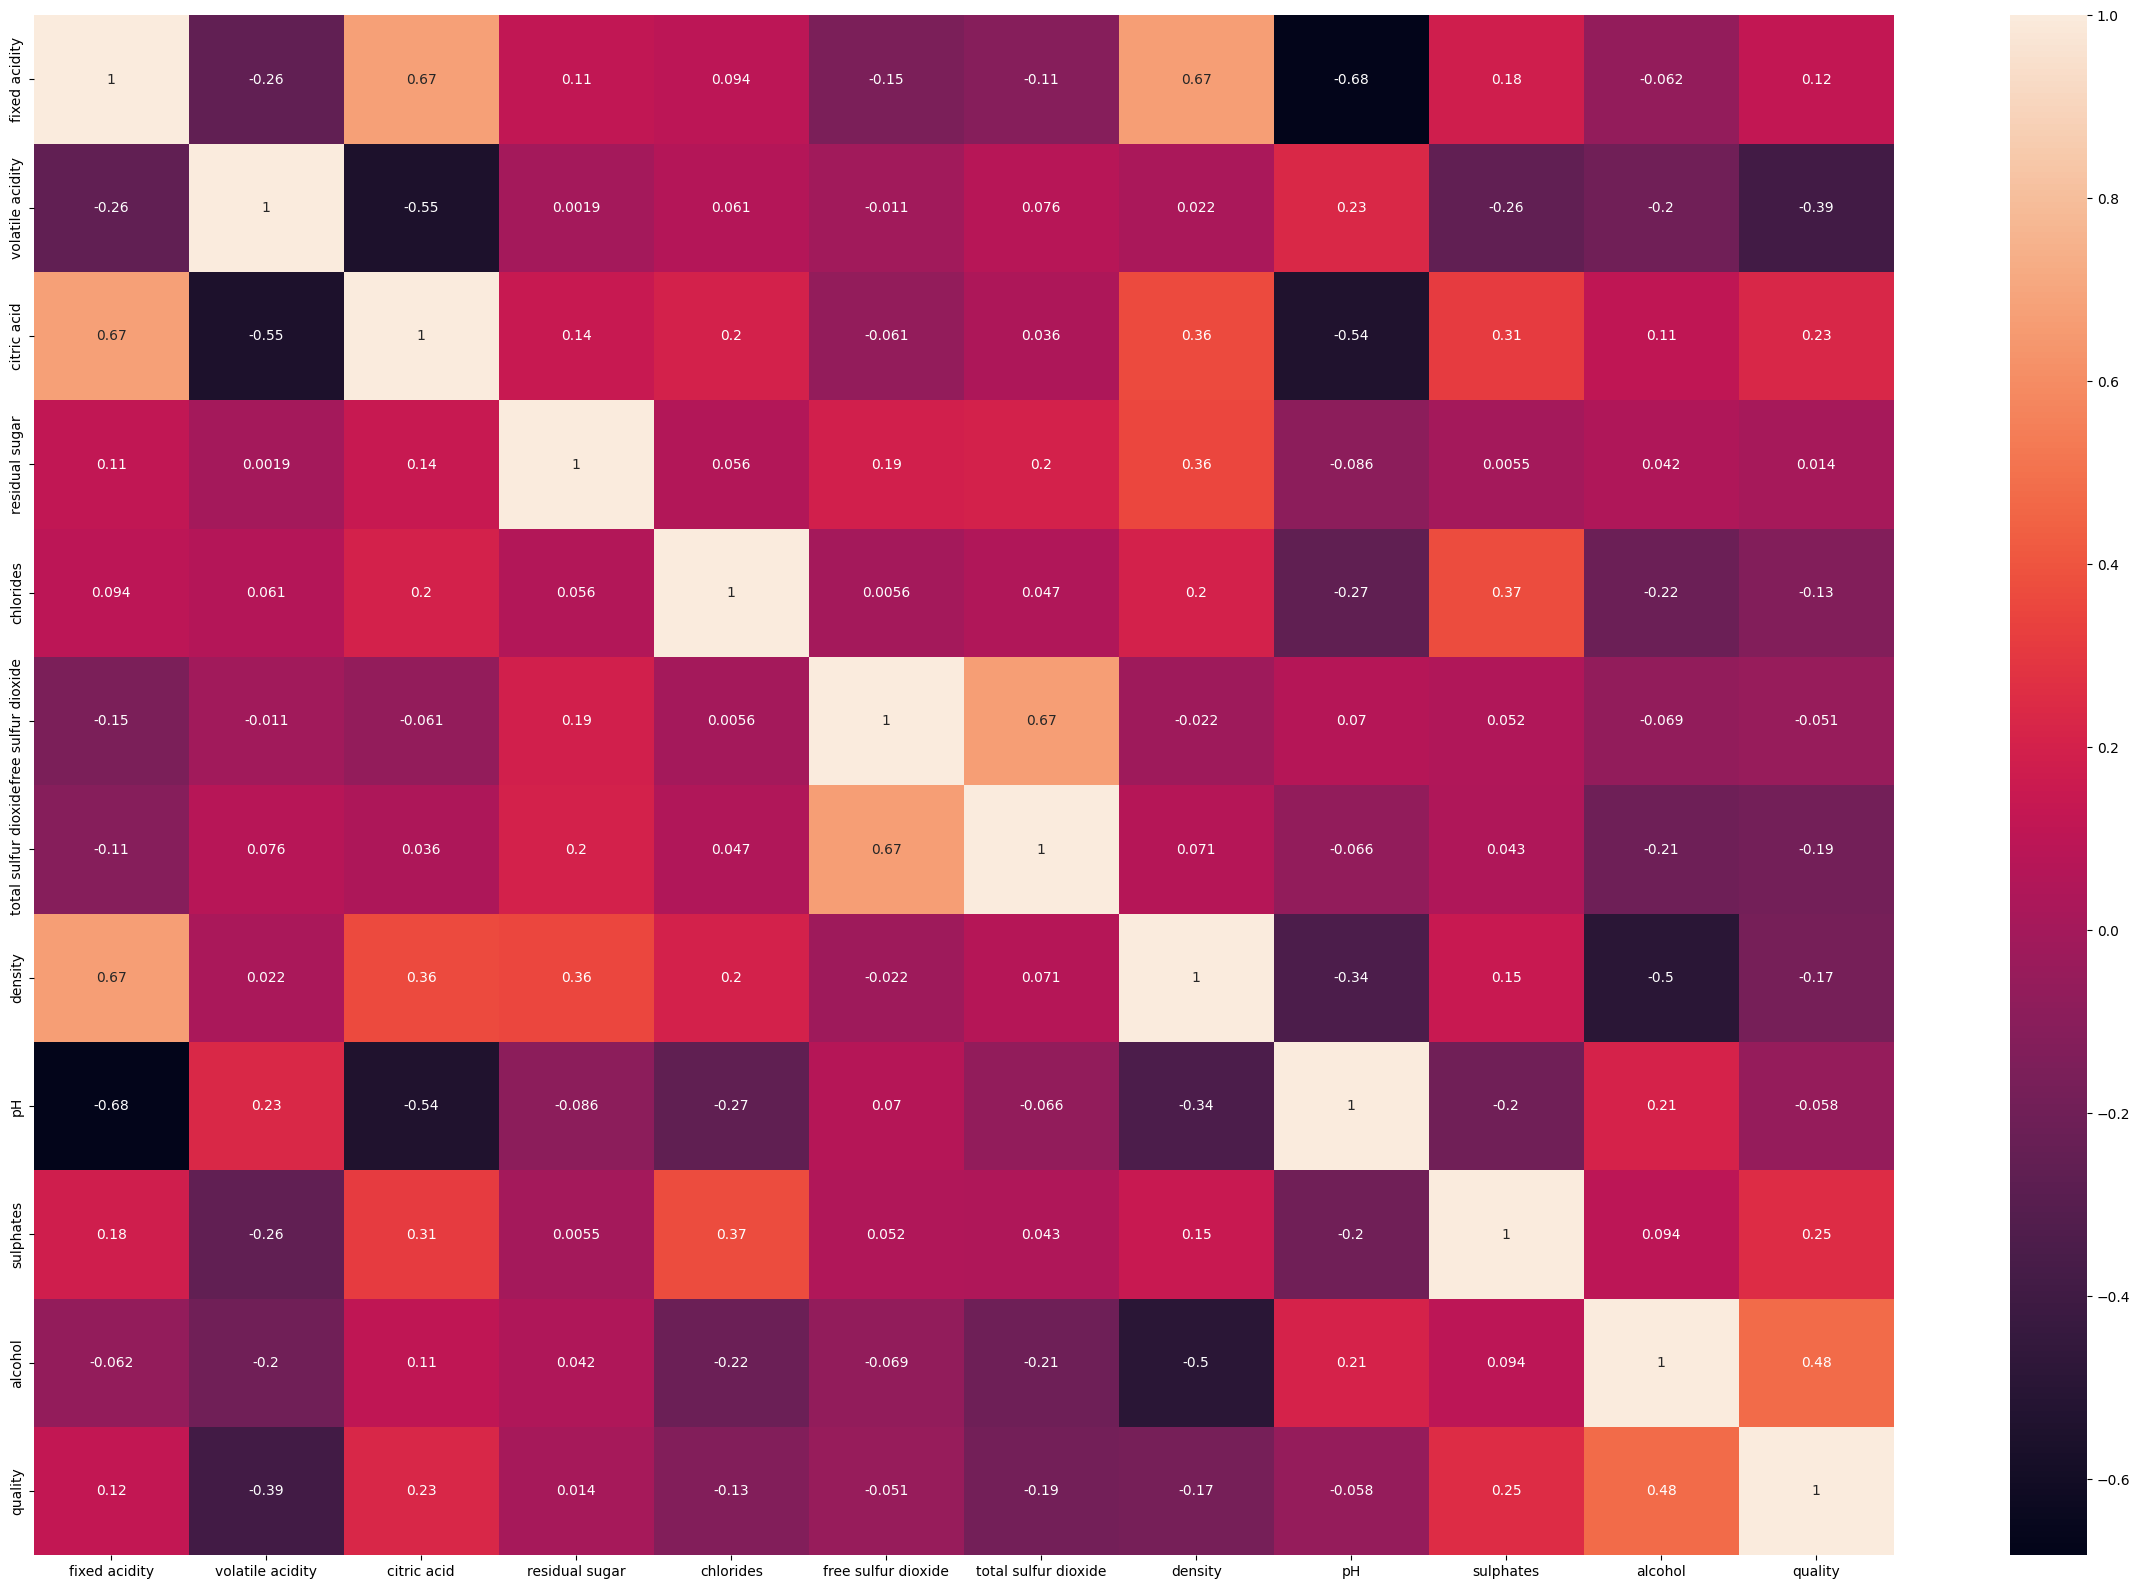

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(30,20))
corr=data.corr()
sns.heatmap(corr,annot=True)
plt.show()
plt.savefig("correlation_matrix.png")

In [17]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur dioxide  

In [18]:
np.where(z>3)
new_data=data[(z<3).all(axis=1)]

In [19]:
new_data.shape

(1451, 12)

In [23]:
from sklearn.model_selection import train_test_split
#x is input feature
X=new_data.drop(columns='quality')
#y is outcome
y=new_data['quality']

In [24]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [25]:
y_pred

array([7, 5, 5, 6, 6, 5, 6, 5, 6, 5, 7, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5,
       5, 5, 7, 6, 6, 7, 5, 5, 7, 5, 6, 5, 5, 6, 6, 6, 5, 5, 7, 7, 6, 6,
       6, 6, 6, 6, 5, 5, 7, 5, 5, 5, 6, 5, 5, 7, 6, 6, 5, 5, 6, 5, 5, 6,
       5, 6, 6, 7, 6, 5, 5, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5,
       5, 7, 5, 6, 6, 7, 5, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 7, 5, 6, 6, 5, 5, 5, 7, 5, 6, 7, 5, 6, 6, 7, 6, 6, 7,
       6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 6, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 7, 6, 5, 6, 6,
       6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 6, 7, 7, 5, 6, 5, 6, 6, 6, 6, 7, 5,
       6, 5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 5, 6, 7, 6, 7, 5, 5, 7, 7, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 7, 5, 6, 6, 5, 5, 5,
       5, 6, 6, 6, 6])

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 0  7  4  0  0]
 [ 0 85 34  1  0]
 [ 0 27 87  2  0]
 [ 0  4  9 27  0]
 [ 0  0  1  3  0]]

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.69      0.71      0.70       120
           6       0.64      0.75      0.69       116
           7       0.82      0.68      0.74        40
           8       0.00      0.00      0.00         4

    accuracy                           0.68       291
   macro avg       0.43      0.43      0.43       291
weighted avg       0.65      0.68      0.67       291


Accuracy Score: 0.6838487972508591


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:\n", feature_importance)


Feature Importances:
                  Feature  Importance
10               alcohol    0.157697
9              sulphates    0.117674
6   total sulfur dioxide    0.102118
1       volatile acidity    0.092555
7                density    0.091228
4              chlorides    0.079790
0          fixed acidity    0.076994
2            citric acid    0.075347
8                     pH    0.073030
3         residual sugar    0.069053
5    free sulfur dioxide    0.064514
